In [48]:
import json
with open('../wordbank/bodyParts.json', 'r') as fp:
    data = json.load(fp)

In [49]:
words = data['bodyParts']

In [50]:
#process words so they can all be lowercase/or otherwise
words_processed = []
for word in words:
    word = word.lower().split('\n')
    words_processed += word

In [51]:
import spacy
nlp = spacy.load("en_core_web_md")

In [52]:
#vec() functions outputs the vector data of that word 
def vec(s):
    return nlp.vocab[s].vector

In [53]:
#dictionary that stores all vector data of all words
model = {}
for word in words_processed:
    word_vec = vec(word)
    model[word] = word_vec
    print("processed " + word)

processed ankle
processed arm
processed back
processed belly
processed bottom
processed breast
processed buttocks
processed calf
processed cheek
processed chin
processed ear
processed elbow
processed eye
processed eyebrow
processed eyelash
processed finger
processed fist
processed foot
processed forearm
processed forehead
processed hair
processed hand
processed head
processed hip
processed knee
processed leg
processed lip
processed mouth
processed neck
processed nose
processed nostril
processed shoulder
processed thigh
processed thumb
processed toe
processed tongue
processed tooth
processed waist
processed wrist


In [56]:
len(model)

39

In [57]:
#t-SNE model flatten and showcases the data
from sklearn.manifold import TSNE

In [58]:
import matplotlib.pyplot as plt
labels = []
tokens = []
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

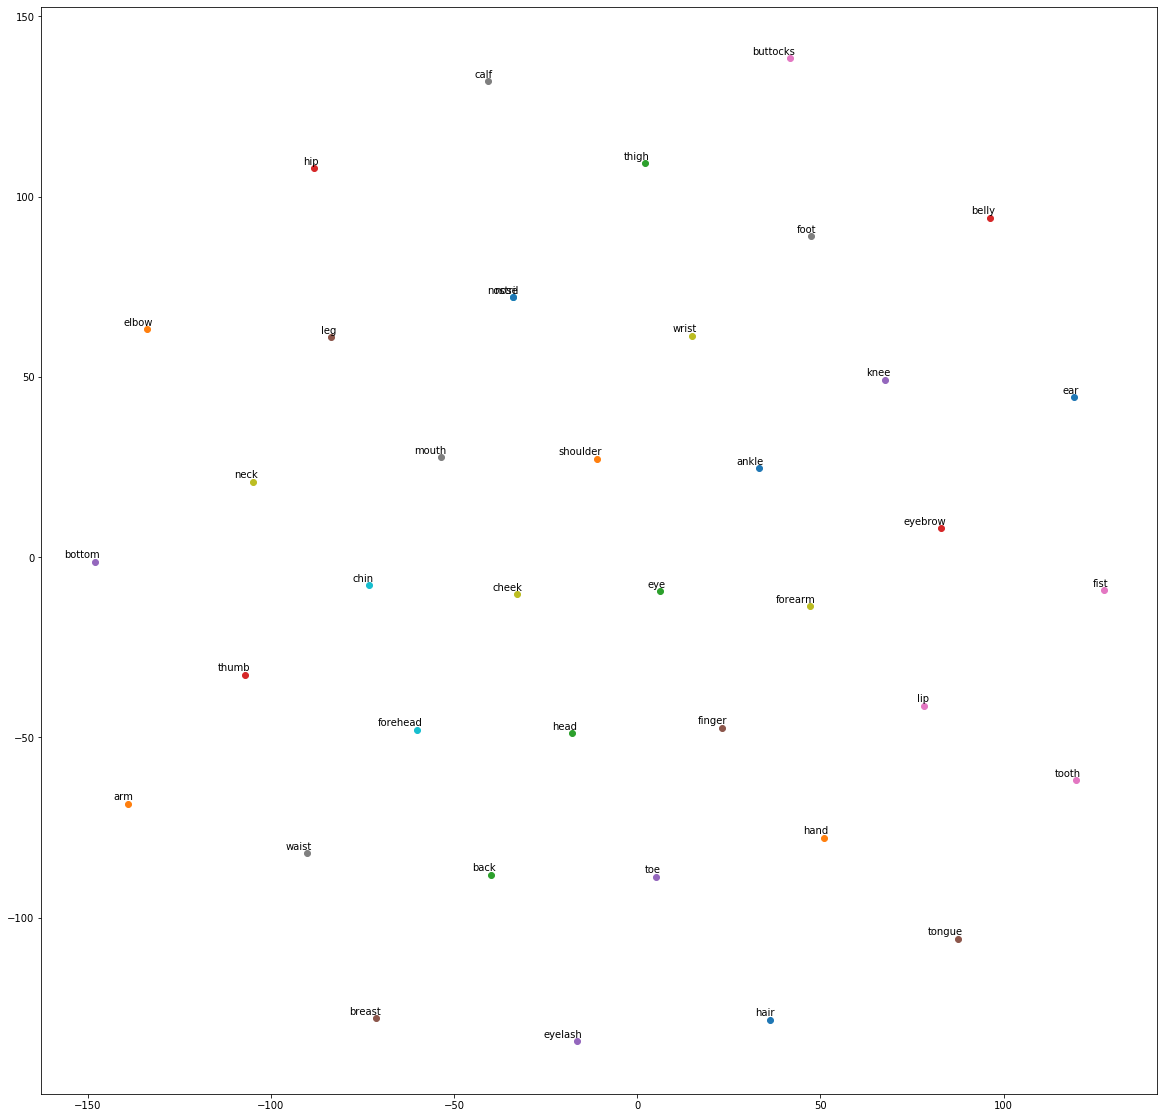

In [59]:
tsne_plot(model)

In [60]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
new_values

array([[  33.10708  ,   24.584068 ],
       [-138.925    ,  -68.38971  ],
       [ -39.98942  ,  -88.12294  ],
       [  96.239136 ,   94.100784 ],
       [-148.12186  ,   -1.2781104],
       [ -71.3176   , -127.85732  ],
       [  41.617443 ,  138.33434  ],
       [ -40.83579  ,  132.09514  ],
       [ -32.821888 ,  -10.327444 ],
       [ -73.30214  ,   -7.8370447],
       [ 119.13539  ,   44.334362 ],
       [-133.73793  ,   63.166084 ],
       [   6.3268685,   -9.492613 ],
       [  83.06305  ,    7.952221 ],
       [ -16.495697 , -134.37444  ],
       [  23.197    ,  -47.330112 ],
       [ 127.38234  ,   -9.205543 ],
       [  47.5491   ,   89.080894 ],
       [  47.19345  ,  -13.69185  ],
       [ -60.092335 ,  -47.863033 ],
       [  36.22548  , -128.35242  ],
       [  50.948864 ,  -77.85545  ],
       [ -17.70218  ,  -48.8303   ],
       [ -88.374565 ,  107.94014  ],
       [  67.73949  ,   49.180447 ],
       [ -83.55955  ,   60.9298   ],
       [  78.28746  ,  -41.17405  ],
 

In [64]:
coordinates = {}
for i in range(len(labels)):
    coordinates[labels[i]] = new_values[i].tolist()

In [65]:
import math
def distance(word1,word2):
    word1 = word1.lower()
    word2 = word2.lower()
    x = coordinates[word2][0] - coordinates[word1][0] 
    y = coordinates[word2][1] - coordinates[word1][1] 
    dist = math.hypot(x,y)
    return dist

In [66]:
distance("toe","leg")

173.87846288068823

In [67]:
distance("toe","wrist")

150.41560598425323

In [68]:
distance("eye","nose")

90.9678481113174

In [69]:
distance("eye","foot")

106.84572347631803

In [72]:
coordinates.values()

dict_values([[33.107078552246094, 24.584068298339844], [-138.9250030517578, -68.38970947265625], [-39.98942184448242, -88.12294006347656], [96.2391357421875, 94.10078430175781], [-148.12185668945312, -1.278110384941101], [-71.31759643554688, -127.8573226928711], [41.6174430847168, 138.33433532714844], [-40.83578872680664, 132.0951385498047], [-32.8218879699707, -10.327444076538086], [-73.30213928222656, -7.837044715881348], [119.13539123535156, 44.3343620300293], [-133.73793029785156, 63.16608428955078], [6.326868534088135, -9.492612838745117], [83.06304931640625, 7.952220916748047], [-16.495697021484375, -134.3744354248047], [23.19700050354004, -47.33011245727539], [127.38233947753906, -9.20554256439209], [47.54909896850586, 89.08089447021484], [47.193450927734375, -13.691849708557129], [-60.09233474731445, -47.863033294677734], [36.22547912597656, -128.3524169921875], [50.9488639831543, -77.85545349121094], [-17.702180862426758, -48.830299377441406], [-88.37456512451172, 107.94013977

In [74]:
def translate(leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return valueScaled

In [75]:
translate(-1000,1000,-300,300)

NameError: name 'value' is not defined